# IMPLEMENT NON-LINEAR REGRESSION(China_GDP)

## Plot Graph between Year and GDP value for given dataset

## Author:-Krishna Prajapati
-----------------------------------------

In [16]:
## Importing Important Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [17]:
## Loading the csv file in C_DATA.

C_DATA=pd.read_csv(r"C:\Users\KRISHNA PRAJAPATI\Desktop\Techedu internship\China_GDP.csv")

In [18]:
C_DATA.head() ## Showing only 5 rows of the dataset

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


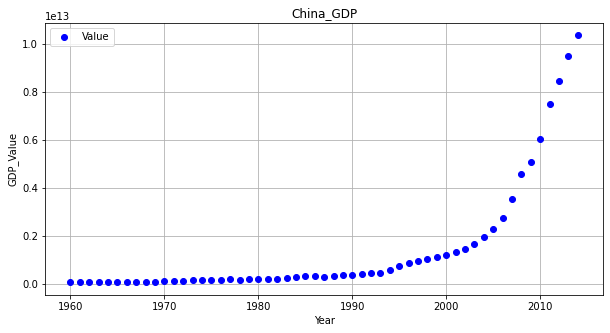

In [19]:
## Plotting the line graph as dotted points
plt.figure(figsize=(10,5))
plt.plot("Year","Value",'bo',data=C_DATA)
plt.xlabel("Year")
plt.ylabel("GDP_Value")
plt.title("China_GDP")
plt.grid()
plt.legend()
plt.show()

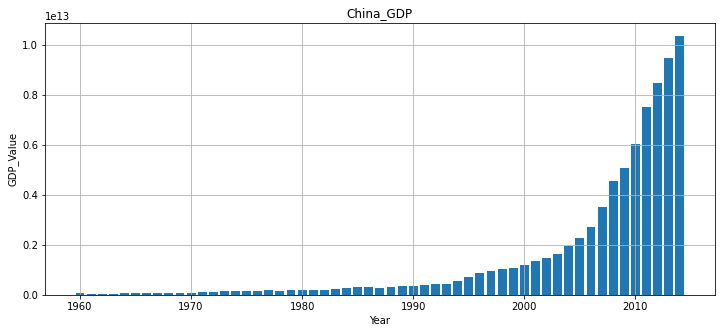

In [20]:
## Ploting Bar_graph.

plt.figure(figsize=(12,5))
plt.bar(x="Year",height="Value",data=C_DATA)
plt.xlabel("Year")
plt.ylabel("GDP_Value")
plt.title("China_GDP")
plt.grid()
plt.show()

## From the Graph ,it can be observed that GDP of China is increasing slowly and after 2000,it's GDP has increased rapidly.

#### Building the Model

In [21]:
x_data=C_DATA["Year"].values
y_data=C_DATA["Value"].values

In [22]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
beta_1 = 0.10
beta_2 = 1990.0
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

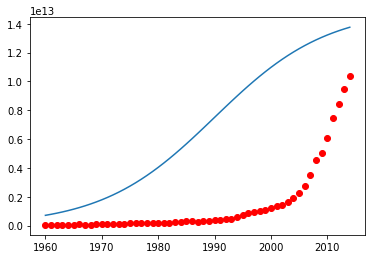

In [23]:
#plot initial prediction against datapoints

plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [24]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

### Now we plot our resulting regression model.

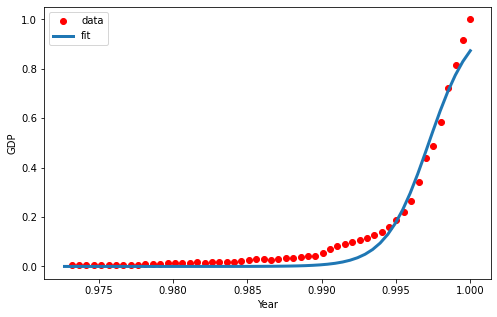

In [25]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

#### split data into train/test

In [39]:
msk = np.random.rand(len(C_DATA)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [40]:
# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)
y_hat = sigmoid(test_x, *popt)


### Evaluation of the Model

In [41]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y))

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.93


# Thank you